# Homework Assignment 1: Titanic Survival Prediction

**Submission Deadline: Two weeks from today (July 10th, 2023)**

In this assignment, you will be working with the famous Titanic dataset to predict the survival of passengers based on various features. You will go through the following steps:

1. **Exploratory Data Analysis (EDA):** Perform an initial analysis of the dataset to understand its structure and gain insights into the variables.

2. **Data Preprocessing:** Clean the data by handling missing values and converting categorical variables to numerical form.

3. **Model Implementation:** Implement the following classification models for predicting survival:
   - Adaptive Linear Neuron (Perceptron)
   - Logistic Regression
   - Support Vector Machine (SVM)
   - Decision Tree
   - Random Forest

4. **Model Evaluation:** Train and evaluate each model using appropriate evaluation metrics and compare their performance.

5. **Submission:** Submit your completed Jupyter Notebook (.ipynb file) along with any necessary explanations or findings.

## Instructions:

1. Download the Titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv).

2. Perform the EDA and data preprocessing steps mentioned above. This includes handling missing values, converting categorical variables, and any other necessary data cleaning.

3. Implement the five classification models mentioned above using scikit-learn. Train each model on the preprocessed dataset and evaluate its performance using appropriate evaluation metrics (e.g., accuracy).

4. Provide a brief summary of your findings for each model. Which model performed the best? Were there any challenges or limitations you encountered during the analysis?

5. Submit your completed Jupyter Notebook (.ipynb file) along with any additional explanations or insights you gained from the analysis.

**Grading Points:**

1. Exploratory Data Analysis (EDA) - 30 points:
   - Proper display and understanding of the dataset (5 points)
   - Summary statistics and missing value analysis (5 points)
   - Relevant visualizations to explore the data (10 points)
   - Additional explanations or insights provided (5 points)

2. Data Preprocessing - 15 points:
   - Proper handling of missing values (5 points)
   - Correct conversion of categorical variables (5 points)
   - Removal of irrelevant columns (5 points)

3. Model Implementation - 25 points:
   - Correct implementation of the five classification models (5 points each, total 25 points)

4. Model Evaluation - 25 points:
   - Proper evaluation metrics used (e.g., accuracy) (10 points)
   - Comparison of model performance (10 points)
   - Detailed explanation of findings (5 points)

5. Submission - 10 points:
   - Complete and organized Jupyter Notebook (.ipynb file) submission (2 points)
   - Additional explanations or insights provided (7 points)

**Total: 100 points**

**Note:**  This assignment is designed to assess your understanding of exploratory data analysis, data preprocessing, and classification modeling.

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# download titanic dataset online and save as titanic_data.csv
req = requests.get('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
url_content = req.content
csv_file = open('titanic_data.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

# EDA & Data Preprocessing

## Data Understanding

In [ ]:
# read csv file
df = pd.read_csv('/content/titanic_data.csv')

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
df.shape # dataset has 891 rows and 12 columns(features)

(891, 12)

In [ ]:
# Generating descriptive statistics of numerical features of the dataframe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Findings: Only 38% out of dataset survived the Titanic accident. As we can see, Age has only values for 714 and its min is 0.42 which is float. That has to be fixed.

In [ ]:
# Getting a summary of the DataFrame, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Findings:  

*  As mentioned earlier, Age has problem with data type which is float and empty values problem for 179 rows (891-714 = 177 rows)
*   Cabin column has empty values for 891-204 = 687 rows
*   Embarked column has empty values for 891-889 = 2 rows
*   Remarks: Every feature needs to be checked whether they have sensible values or not by using unique() and count methods





In [ ]:
print(df['PassengerId'].unique())
df['PassengerId'].count()

#Since PassengerId has integer values with unique count 891, its values are valid
#but Ids are not useful for training as they don't have any meaning behind its values

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

891

In [ ]:
print(df['Survived'].unique())
df['Survived'].count()

#Survived has boolean values with unique count 891 so its values are valid

[0 1]


891

In [ ]:
print(df['Sex'].unique())
df['Sex'].count()

#Sex is categorized into male and female with unique count 891 so its values are valid

['male' 'female']


891

In [ ]:
print(df['Age'].unique())
df['Age'].count()

#Age is float data type and it doesn't make sense. It also contains nan value and missing values.
#In order to solve missing value problem, missing values can be replaced with mean, median or mode.

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


714

In [ ]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Findings: Other features where Age values are NaN are distributed and unable to find relationships among them. So NaN values of Age are on their own and they can independently be replaced with its median value as median is not prone to outliers.

## **Replacing missing values in Age**





In [ ]:
# Calculate the median age per passenger class
median_age_by_pclass = df.groupby('Pclass')['Age'].median()

# Function to replace missing age values with the median age based on passenger class
def fill_age(row):
    if pd.isnull(row['Age']):
        return median_age_by_pclass[row['Pclass']]
    else:
        return row['Age']

# Apply the function to fill missing age values
df['Age'] = df.apply(fill_age, axis=1)

# Check the updated DataFrame
print(df['Age'].isnull().sum())  # Should output 0 if all missing values are replaced

df['Age'].count()

0


891

In [ ]:
# Convert 'Age' column from float to integer
df['Age'] = df['Age'].astype(int)

# Replace values between 0 and 1 with 1
df['Age'] = df['Age'].apply(lambda x: 1 if 0 < x < 1 else x)

# Check the updated DataFrame
print(df['Age'].head())

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int64


In [ ]:
print(df['SibSp'].unique())
df['SibSp'].count()

#SibSp which represents number of siblings abroad and spouses has integer values with non missing values

[1 0 3 4 2 5 8]


891

In [ ]:
print(df['Parch'].unique())
df['Parch'].count()

#Parch(# of parents / children aboard) has integer values with non missing values

[0 1 2 5 3 4 6]


891

In [ ]:
print(df['Ticket'].unique())
df['Ticket'].count()

#Ticket column is valid with non missing values so it is valid

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '35281' '

891

In [ ]:
print(df['Fare'].unique())
df['Fare'].count()

#Fare column has integer values with non missing values

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.      22.025   50.       8.4042   6.4958  10.4625
  1

891

In [ ]:
print(df['Cabin'].unique())
df['Cabin'].count()

#Since Cabin has many missing values and doesn't have much impact on training, it can be dropped

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


204

## **Replacing missing values in Cabin**

In [ ]:
# drop Cabin column
df = df.drop(['Cabin'], axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
print(df['Embarked'].unique())
print(df['Embarked'].count())
df[df['Embarked'].isna()]

#Embarked (port of embarcation: C = Cherbourg, Q = Queenstown, S = Southampton) has initial letters and also two non missing values

['S' 'C' 'Q' nan]
889


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
# Two rows with Embarked missing values will be replaced with mode since it is only two rows
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'].isnull().sum()


0

In [ ]:
# After data cleaning and preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Data Visualization

**Survival status in dataset using bar plot**

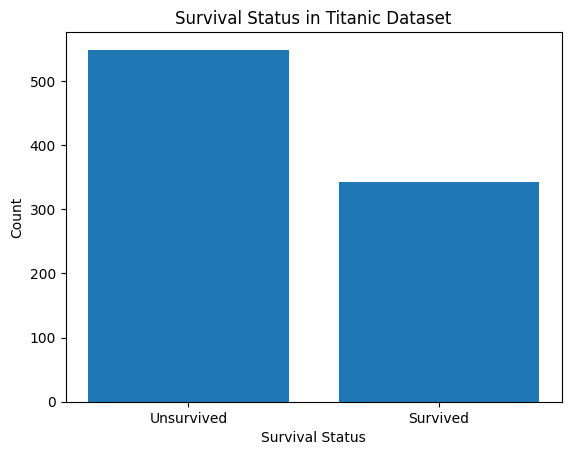

In [ ]:
# Count the number of survivors and non-survivors
survived_counts = df['Survived'].value_counts()
percentage = survived_counts / len(df) * 100

# Create a bar plot to visualize the survival status
plt.bar(survived_counts.index, survived_counts.values)
plt.xticks([0, 1], ['Unsurvived', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Status in Titanic Dataset')
plt.show()

In [ ]:
survived_counts

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
percentage # it shows that more than half of 891 people (61.6%) were not survived in titanic accident

**Survival status by sex**

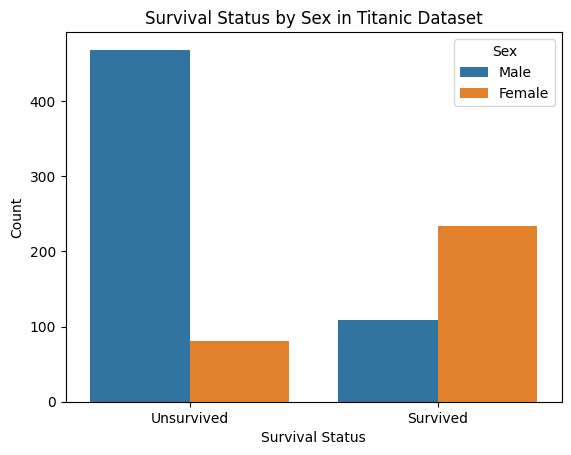

In [ ]:
# Create a countplot to visualize survival status by sex
sns.countplot(data=df, x='Survived', hue='Sex')
plt.xticks([0, 1], ['Unsurvived', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Status by Sex in Titanic Dataset')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()

In [ ]:
# Calculate the count of survivors and non-survivors by sex
survival_by_sex = df.groupby(['Sex', 'Survived']).size()

# Calculate the total count for each sex
total_by_sex = df.groupby('Sex').size()

# Calculate the percentage of survival for each sex
percentage_by_sex = survival_by_sex / total_by_sex * 100

# Print the percentage values
print(percentage_by_sex)

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
dtype: float64


In [ ]:
total_by_sex # number of male and female

Sex
female    314
male      577
dtype: int64

In [ ]:
# calculate the percentage of each Sex in the dataset
total = total_by_sex[0] + total_by_sex[1]
female_percent = (total_by_sex[0] / total) * 100
male_percent = (total_by_sex[1] / total) * 100
print("Male: {}%, Female: {}%".format(male_percent, female_percent))


Male: 64.75869809203144%, Female: 35.24130190796858%


We can conclude that although number of males are way more higher than females **(Male: 64.7%, Female: 35.2%)**, females were more likely to survive during titanic accident. 74% of females were survived while 18% of males were only survived.

**Survival Status by Age in Titanic Dataset**

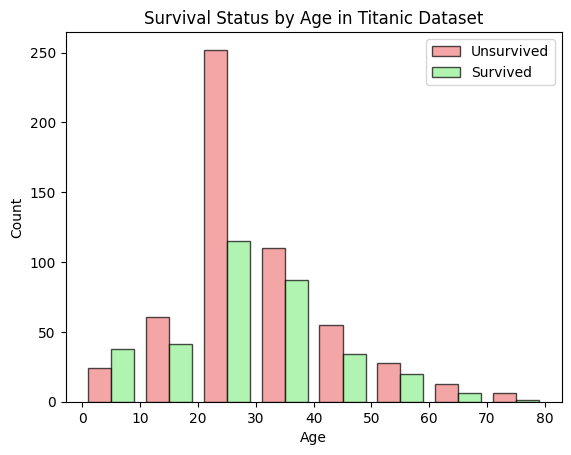

In [ ]:
# Create bins for age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Create a histogram to visualize survival status by age
plt.hist([df[df['Survived'] == 0]['Age'], df[df['Survived'] == 1]['Age']],
         bins=bins, label=['Unsurvived', 'Survived'], color=['lightcoral', 'lightgreen'], edgecolor='black', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survival Status by Age in Titanic Dataset')
plt.legend()
plt.show()

Findings: Child with age less than 10 were more likely to survive and 20-30 years old young adults were unsurvived the most.

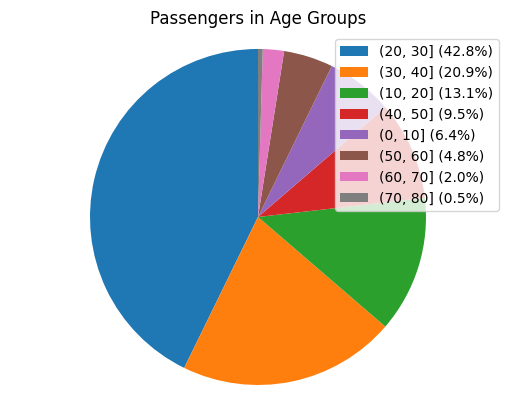

In [ ]:
# Categorize the age values into age groups
age_groups = pd.cut(df['Age'], bins=bins)

# Count the number of passengers in each age group
age_group_counts = age_groups.value_counts()

# Calculate the percentage of passengers in each age group
percentage_age_groups = (age_group_counts / age_group_counts.sum()) * 100

# Create labels for the pie chart
labels = age_group_counts.index.astype(str)

# Create values for the pie chart
values = percentage_age_groups.values

# Create a pie chart to visualize the percentage of age groups
_, _, autopcts = plt.pie(age_group_counts, labels=labels, startangle=90, autopct='', textprops={'color': 'white'})

plt.title('Passengers in Age Groups')
plt.axis('equal')

# Create a custom legend with the percentage values
legend_labels = [f'{label} ({value:.1f}%)' for label, value in zip(labels, values)]
plt.legend(legend_labels, loc='upper right')

# Add percentage labels outside the pie chart
for autopct, label in zip(autopcts, labels):
    plt.text(0.9, 0.1, autopct.get_text(), color='white', weight='bold')

plt.show()

20-30 years old people were on the titanic cruise the most (42.8%) but they were unsurvived the most.

**Percentage of Survived and Unsurvived Passengers in Age Groups**

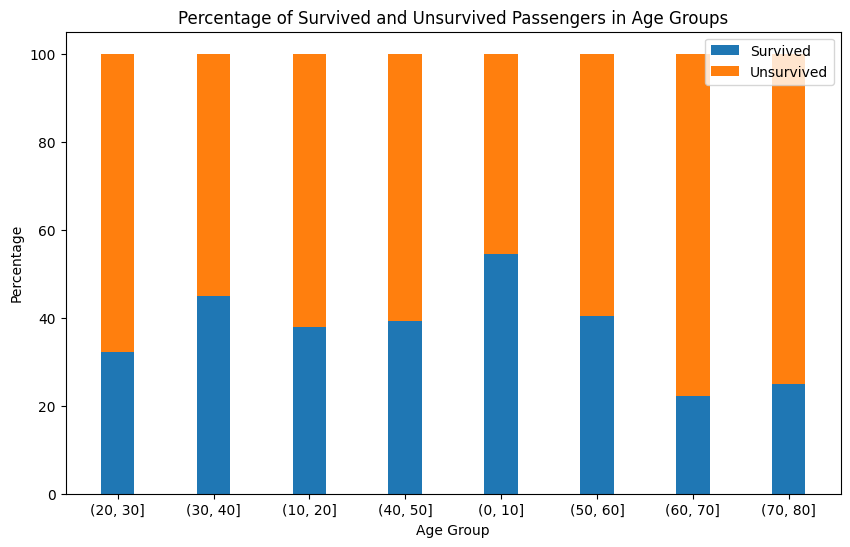

In [ ]:
# Categorize the age values into age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins)

# Calculate the total count of passengers in each age group
age_group_counts = df['AgeGroup'].value_counts()

# Calculate the count of survived passengers in each age group
survived_counts = df[df['Survived'] == 1]['AgeGroup'].value_counts()

# Calculate the count of unsurvived passengers in each age group
unsurvived_counts = df[df['Survived'] == 0]['AgeGroup'].value_counts()

# Calculate the percentages of age groups for survived and unsurvived passengers
survived_percentages = (survived_counts / age_group_counts) * 100
unsurvived_percentages = (unsurvived_counts / age_group_counts) * 100

# Create a bar chart to visualize the percentages
plt.figure(figsize=(10, 6))
x = age_group_counts.index.astype(str)
width = 0.35

plt.bar(x, survived_percentages, width, label='Survived')
plt.bar(x, unsurvived_percentages, width, bottom=survived_percentages, label='Unsurvived')

plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Percentage of Survived and Unsurvived Passengers in Age Groups')
plt.legend()
plt.show()

In [ ]:
survived_percentages


(20, 30]    32.275132
(30, 40]    44.864865
(10, 20]    37.931034
(40, 50]    39.285714
(0, 10]     54.385965
(50, 60]    40.476190
(60, 70]    22.222222
(70, 80]    25.000000
Name: AgeGroup, dtype: float64

In [ ]:
unsurvived_percentages

(20, 30]    67.724868
(30, 40]    55.135135
(10, 20]    62.068966
(40, 50]    60.714286
(0, 10]     45.614035
(50, 60]    59.523810
(60, 70]    77.777778
(70, 80]    75.000000
Name: AgeGroup, dtype: float64

Findings: Interesting fact is that even though the number of age group (20, 30] were unsurvived the most, if we calculate the survival percentage of its own age group, (70, 80] were unsurvived the most (75% of total 70-80 yrs old)

**Percentage  of survival by Sex and Pclass**

In [ ]:
#Total distribution of people grouped by Sex and Pclass
pclass_total = df.groupby(['Sex', 'Pclass']).count()['Survived']
pclass_total

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64

In [ ]:
#Total distribution of survived people grouped by Sex and Pclass
pclass_survived = df.groupby(['Sex', 'Pclass']).sum()['Survived']
pclass_survived

<ipython-input-43-54138b3dda90>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pclass_survived = df.groupby(['Sex', 'Pclass']).sum()['Survived']


Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64

In [ ]:
pclass_survived/pclass_total * 100

Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64

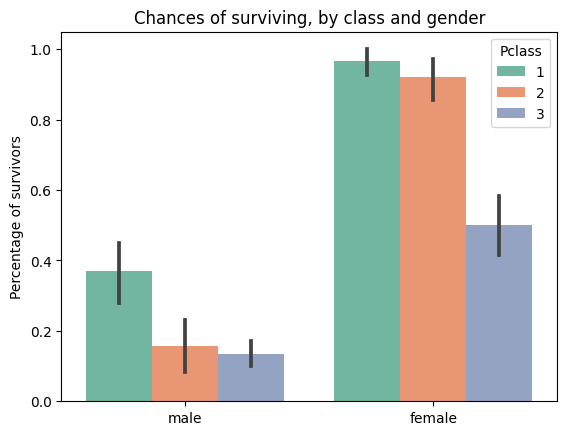

In [ ]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", palette="Set2", data=df)
plt.xlabel('')
plt.ylabel('Percentage of survivors')
plt.title('Chances of surviving, by class and gender')
plt.show()

Findings: passengers from class 1 (both male and female) had more chances to survive than other classes. And class 3 passengers were unsurvived the most.

**Percentage of survival by Age and Pclass**

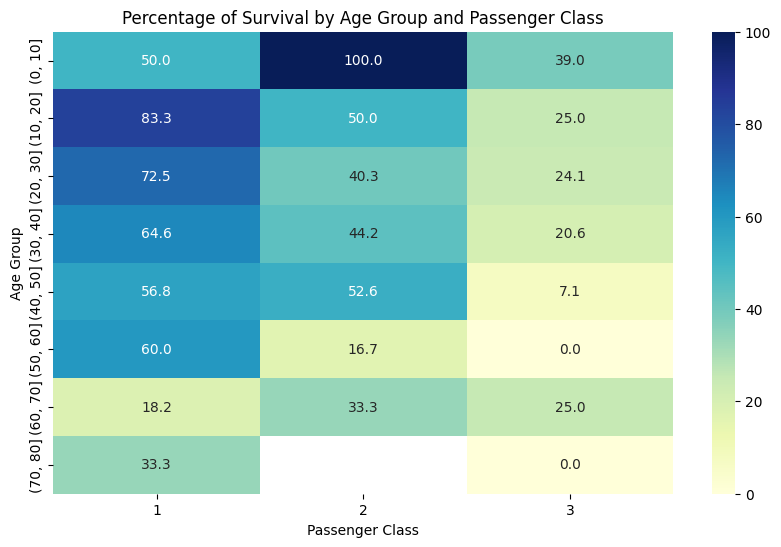

In [ ]:
# Calculate the total count of passengers in each age group and Pclass
age_group_counts = df.groupby(['AgeGroup', 'Pclass'])['PassengerId'].count()

# Calculate the count of survived passengers in each age group and Pclass
survived_counts = df[df['Survived'] == 1].groupby(['AgeGroup', 'Pclass'])['PassengerId'].count()

# Calculate the percentage of survival by age group and Pclass
survival_rates = (survived_counts / age_group_counts) * 100

# Convert the DataFrame to a pivot table for plotting
pivot_table = survival_rates.unstack()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlGnBu')

plt.xlabel('Passenger Class')
plt.ylabel('Age Group')
plt.title('Percentage of Survival by Age Group and Passenger Class')

plt.show()

**Age distribution based on gender**

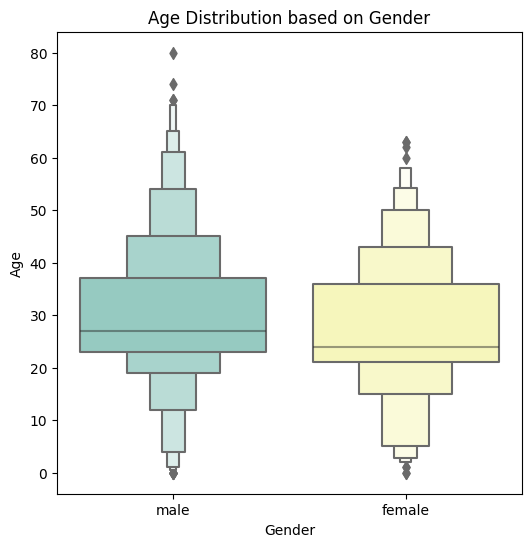

In [ ]:
# Plot violin plots
plt.figure(figsize=(6, 6))
sns.boxenplot(data=df, x='Sex', y='Age', palette='Set3')

plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution based on Gender')
plt.show()

**Number of siblings and parents/childs the passengers were travelling with**




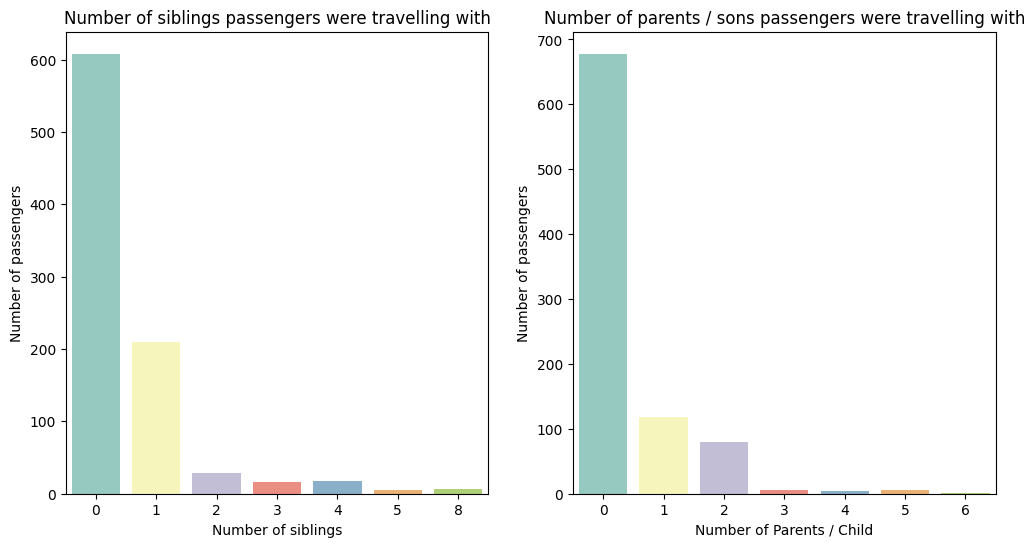

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=False)

sns.countplot(x="SibSp", palette="Set3", data=df, ax=ax1)
ax1.set_title("Number of siblings passengers were travelling with")
ax1.set_xlabel("Number of siblings")
ax1.set_ylabel("Number of passengers")

sns.countplot(x="Parch", palette="Set3", data=df, ax=ax2)
ax2.set_title("Number of parents / sons passengers were travelling with")
ax2.set_ylabel("Number of passengers")
ax2.set_xlabel("Number of Parents / Child")

plt.show()

Findings: Passengers tended to travel alone compared to travelling with siblings/parents/children.

**Fare distribution of passengers**

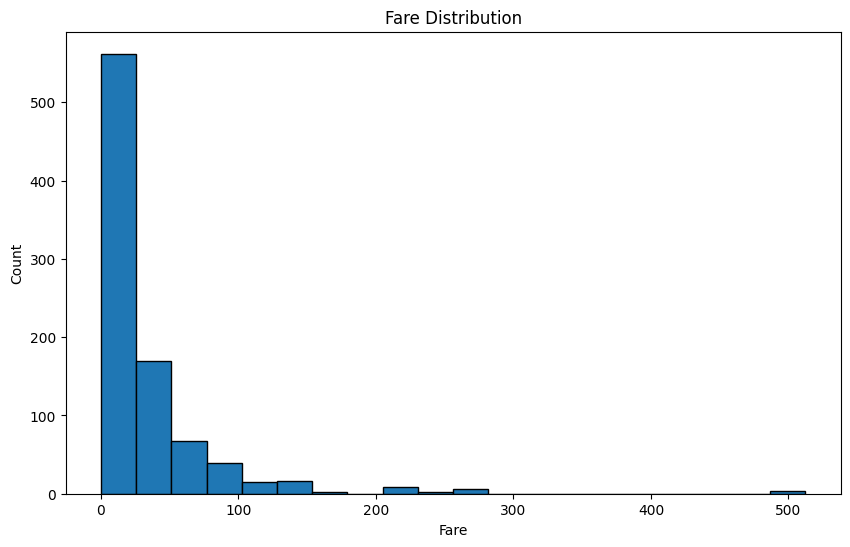

In [ ]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=20, edgecolor='black')

plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

In [ ]:
df.corr()

<ipython-input-61-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035948,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.047266,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.408557,0.083081,0.018443,-0.549500
Age,0.035948,-0.047266,-0.408557,1.000000,-0.243302,-0.171361,0.123918
SibSp,-0.057527,-0.035322,0.083081,-0.243302,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.171361,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.123918,0.159651,0.216225,1.000000


<ipython-input-65-59fa3a5c879f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)


<Axes: >

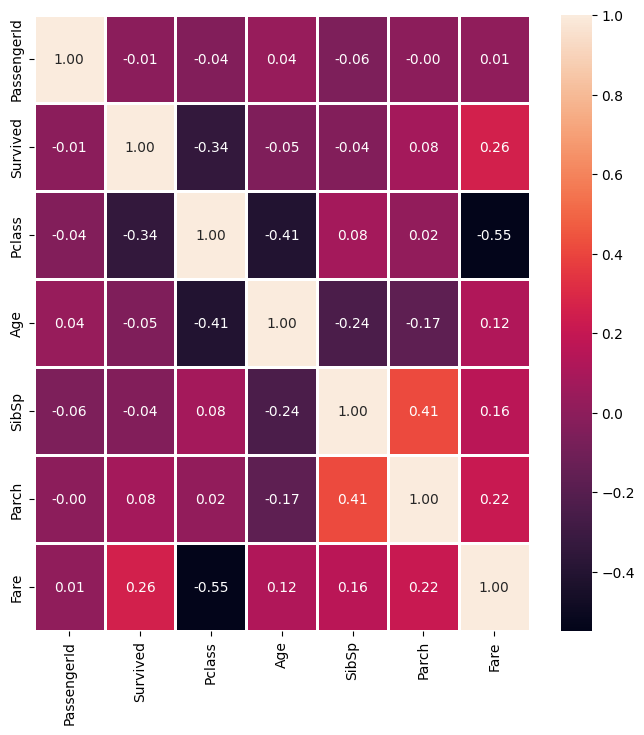

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

# Encoding nominal features

Nominal columns such as Sex and Embarked are encoded using one hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform 'Sex' column
sex_encoded = encoder.fit_transform(df[['Sex']]).toarray()
df_sex_encoded = pd.DataFrame(sex_encoded, columns=['Sex_' + label for label in encoder.categories_[0]])

# Fit and transform 'Embarked' column
embarked_encoded = encoder.fit_transform(df[['Embarked']].astype(str)).toarray()
df_embarked_encoded = pd.DataFrame(embarked_encoded, columns=['Embarked_' + label for label in encoder.categories_[0]])

# Concatenate the encoded columns to the original DataFrame
df_encoded = pd.concat([df, df_sex_encoded, df_embarked_encoded], axis=1)

# Print the encoded DataFrame
print(df_encoded.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Embarked  Sex_female  Sex_male  \
0      0         A/5 21171   7.2500        S         0.0       1.0   
1      0          PC 17599  71.2833        C         1.0       0.0   
2      0  STON/O2. 3101282   7.9250        S         1.0       0.0   
3      0            113803  53.1000        S  

**Separating features and target**


In [ ]:
X = df_encoded.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived','Embarked', 'Sex'], axis=1) #features
Y = df_encoded['Survived'] #target

# Train/test Splitting


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2, stratify=Y)

In [ ]:
print("Training size: ", Y_train.shape)
print("Testing size: ", Y_test.shape)

Training size:  (712,)
Testing size:  (179,)


To achieve optimal performance, many machine learning and optimization algorithms necessitate feature scaling. In this context, we will utilize the StandardScaler class from scikit-learn's preprocessing module to standardize the features.


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Training Adaptive Linear Neuron(Perceptron) Model

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.001, random_state=1)
ppn.fit(X_train_std, Y_train)

Perceptron(eta0=0.001, random_state=1)

In [ ]:
Y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (Y_test != Y_pred).sum())

Misclassified examples: 44


In [ ]:
from sklearn.metrics import accuracy_score

acc_perceptron = round(accuracy_score(Y_test, Y_pred) * 100, 2)

print("Accuracy score: ",acc_perceptron)

Accuracy score:  75.42


# Training Perceptron Model with Regularization

In [ ]:
ppn = Perceptron(penalty='l1', eta0=0.001, random_state=1)
ppn.fit(X_train_std, Y_train)

Perceptron(eta0=0.001, penalty='l1', random_state=1)

In [ ]:
Y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (Y_test != Y_pred).sum())

Misclassified examples: 43


In [ ]:
acc_perceptron_regular = round(accuracy_score(Y_test, Y_pred) * 100, 2)

print("Accuracy score: ",acc_perceptron_regular)

Accuracy score:  75.98


# Training Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, Y_train)


LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [ ]:
Y_pred = lr.predict(X_test_std)
print('Misclassified examples: %d' % (Y_test != Y_pred).sum())

Misclassified examples: 36


In [ ]:
acc_logistic = round(accuracy_score(Y_test, Y_pred) * 100, 2)

print("Accuracy score: ",acc_logistic)

Accuracy score:  79.89


# Logistic Regression with *regularization*

In [ ]:
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, Y_train)
Y_pred = lr.predict(X_test_std)
print('Misclassified examples: %d' % (Y_test != Y_pred).sum())

Misclassified examples: 36


In [ ]:
acc_logistic_regular = round(accuracy_score(Y_test, Y_pred) * 100, 2)

print("Accuracy score: ",acc_logistic_regular)

Accuracy score:  79.89


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[-0.05074221  0.          0.          0.          0.          0.50469002
  -0.00970026  0.          0.          0.        ]]
[[-0.86115833 -0.36133206 -0.1437327   0.          0.01105442  1.0429917
  -0.10729197  0.          0.         -0.08944571]]
[[-1.04802442e+00 -5.64876140e-01 -2.88339912e-01 -5.87444940e-02
   6.86448227e-02  1.30192305e+00 -2.08269358e-03  1.15071130e-03
   0.00000000e+00 -1.34788740e-01]]
[[-1.06985398 -0.58883537 -0.3056229  -0.06830437  0.07582277  1.32355776
   0.          0.00306129  0.         -0.13815253]]
[[-1.07218438e+00 -5.91296564e-01 -3.07394212e-01 -6.92414715e-02
   7.65672520e-02  1.32553160e+00 -4.45887440e-06  1.41962919e-02
   7.80248449e-03 -1.26195582e-01]]
[[-1.07227206 -0.59148604 -0.30754101 -0.06936726  0.07674842  1.39705858
   0.07133418  0.02933326  0.01837363 -0.10910285]]
[[-1.07229377 -0.59150827 -0.3075543  -0.06937639  0.0767547   1.39727605
   0.0715514   0.02

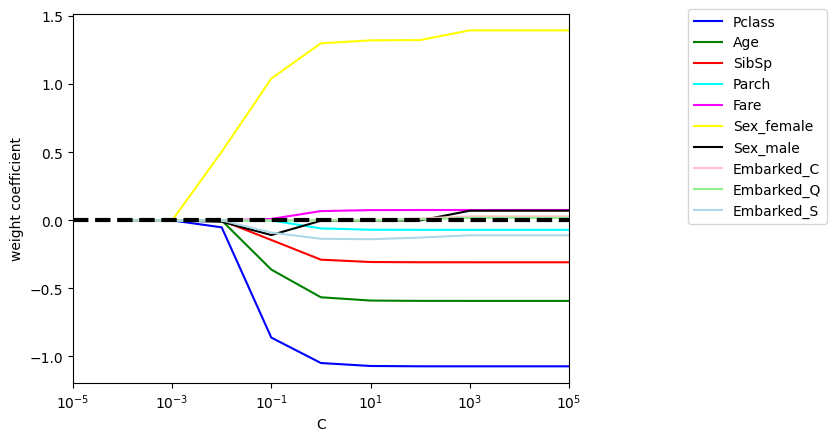

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear',
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, Y_train)
    print(lr.coef_)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=X.columns[column],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300,
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

# Training SVM Model

**As SVM has different values for kernel parameter, all of them will be used and compared to each other since we are not sure about whether titanic dataset is linear or not. kernel can be "linear", "rbf" and "poly"**

The ***linear kernel*** is a good starting point when there is a reasonable expectation that the data might be linearly separable.

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, Y_train)

SVC(kernel='linear', random_state=1)

In [ ]:
# Predict the test set
Y_pred = svm.predict(X_test_std)
print('Misclassified examples: %d' % (Y_test != Y_pred).sum())

# Calculate accuracy score
acc_svm_linear = round(accuracy_score(Y_test, Y_pred) * 100, 2)

print("Accuracy score: ",acc_svm_linear)

Misclassified examples: 40
Accuracy score:  77.65


The ***Radial Basis Function (RBF) kernel*** transforms the data into an infinite-dimensional space based on the Gaussian distribution. RBF kernel is widely used for non-linearly separable data as it can capture complex relationships.

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.500, C=1.0)
svm.fit(X_train_std, Y_train)

SVC(gamma=0.5, random_state=1)

In [ ]:
# Predict the test set
Y_pred = svm.predict(X_test_std)
print('Misclassified examples: %d' % (Y_test != Y_pred).sum())

# Calculate accuracy score
acc_svm_rbf = round(accuracy_score(Y_test, Y_pred) * 100, 2)

print("Accuracy score: ",acc_svm_rbf)

Misclassified examples: 29
Accuracy score:  83.8


***Polynomial kernel*** is useful when the data exhibits polynomial relationships.



In [ ]:
# Train the SVM model with a polynomial kernel
svm = SVC(kernel='poly', degree=3, C=1.0, coef0=100.0)
svm.fit(X_train_std, Y_train)

# Predict on the test set
Y_pred = svm.predict(X_test_std)
print('Misclassified examples: %d' % (Y_test != Y_pred).sum())


# Calculate accuracy score
acc_svm_poly = round(accuracy_score(Y_test, Y_pred) * 100, 2)

print("Accuracy score: ",acc_svm_poly)

Misclassified examples: 33
Accuracy score:  81.56


# Training Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=8,
                                    random_state=1)
tree_model.fit(X_train_std, Y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [ ]:
# Predict the test set
Y_pred = tree_model.predict(X_test_std)
print('Misclassified examples: %d' % (Y_test != Y_pred).sum())

# Calculate accuracy score
acc_dec_tree = round(accuracy_score(Y_test, Y_pred) * 100, 2)

print("Accuracy score: ",acc_dec_tree)

Misclassified examples: 36
Accuracy score:  79.89


# Training Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=40,
                                random_state=1)
forest.fit(X_train_std, Y_train)

RandomForestClassifier(n_estimators=40, random_state=1)

In [ ]:
# Predict the test set
Y_pred = forest.predict(X_test_std)
print('Misclassified examples: %d' % (Y_test != Y_pred).sum())

# Calculate accuracy score
acc_forest = round(accuracy_score(Y_test, Y_pred) * 100, 2)

print("Accuracy score: ",acc_forest)

Misclassified examples: 28
Accuracy score:  84.36


Checking important features according to random forest model

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.258
Age,0.250
Sex_male,0.161
Sex_female,0.137
Pclass,0.081
SibSp,0.048
Parch,0.033
Embarked_S,0.014
Embarked_C,0.011


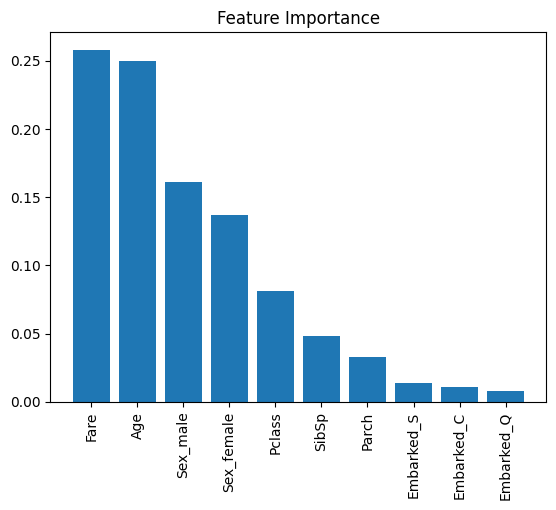

In [ ]:
plt.title('Feature Importance')
plt.bar(importances.importance.index, importances.importance.values)
plt.xticks(rotation=90)
plt.show()

# Comparison of model performance

In [ ]:
results = pd.DataFrame({
    'Model': ['Perceptron', 'Perceptron with regularization',
              'Logistic Regression', 'Logistic Regression with regularization',
              'SVM linear kernel', 'SVM rbf kernel', 'SVM poly kernel',
              'Decision Tree',
              'Random Forest'],
    'Score': [acc_perceptron, acc_perceptron_regular,
              acc_logistic, acc_logistic_regular,
              acc_svm_linear, acc_svm_rbf, acc_svm_poly,
              acc_dec_tree, acc_forest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
84.36,Random Forest
83.80,SVM rbf kernel
81.56,SVM poly kernel
79.89,Logistic Regression
79.89,Logistic Regression with regularization
79.89,Decision Tree
77.65,SVM linear kernel
75.98,Perceptron with regularization
75.42,Perceptron


In conclusion, random forest model got the highest accuracy score 84.36% for predicting titanic survival. But as parameter tuning is not much done while training, we can still imporve the accuracy with the help of tuning other parameter values which are not used here.